In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Stochastic Methods

To better show the potential of stochastic optimizers with accelerators we perform a linear regression with his regularized version through a perceptron or single layer neural network. This problem, aka least squares problem, can be formulated as follows:

$$\min_\theta \sum_{i=1}^m(y_i - X_i^T\theta)^2$$

which change as follow if we introduce some L2 regulrization:

$$\min_{\theta_{ridge}} \sum_{i=1}^m(y_i - X_i^T\theta_{ridge})^2 + \lambda \sum_{j=1}^{n}\theta_{{ridge}_{j}}^{2}$$

In [6]:
import numpy as np

from optiml.ml.utils import generate_centred_and_normalized_regression_data

X, y = generate_centred_and_normalized_regression_data(random_state=1)

The closed solution to linear regression is:

$$\theta^* = (X^TX)^{-1} X^T Y$$

which change as follow if we introduce some L2 regularization:

$$\theta^*_{ridge} = (X^TX + \lambda I)^{-1} X^T Y$$

In [7]:
lmbda = 10

In [8]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 19.86922576, -22.99932987])

In [9]:
np.linalg.inv(X.T.dot(X) + np.identity(X.shape[1]) * lmbda).dot(X.T).dot(y)

array([-0.18954349, -0.32522076])

In [10]:
from optiml.ml.neural_network import NeuralNetworkRegressor
from optiml.ml.neural_network.layers import FullyConnected
from optiml.ml.neural_network.activations import linear
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.neural_network.regularizers import L2

from optiml.opti.utils import plot_trajectory_optimization
from optiml.opti.unconstrained.stochastic import *

## Stochastic Gradient Descent

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 7.7009e-02	 1.6968e-02	 3.0643e-01	r2:  0.7637
 200	 200	 6.4314e-02	 4.2726e-03	 2.5180e-01	r2:  0.7637
 300	 300	 6.1110e-02	 1.0689e-03	 2.5017e-01	r2:  0.7637
 400	 400	 6.0309e-02	 2.6737e-04	 2.5014e-01	r2:  0.7637
 500	 500	 6.0108e-02	 6.6878e-05	 2.5013e-01	r2:  0.7637
 600	 600	 6.0058e-02	 1.6729e-05	 2.5013e-01	r2:  0.7637
 700	 700	 6.0046e-02	 4.1844e-06	 2.5013e-01	r2:  0.7637
 800	 800	 6.0043e-02	 1.0467e-06	 2.5013e-01	r2:  0.7637
 900	 900	 6.0042e-02	 2.6181e-07	 2.5013e-01	r2:  0.7637

[ 19.85476422 -22.98486834]


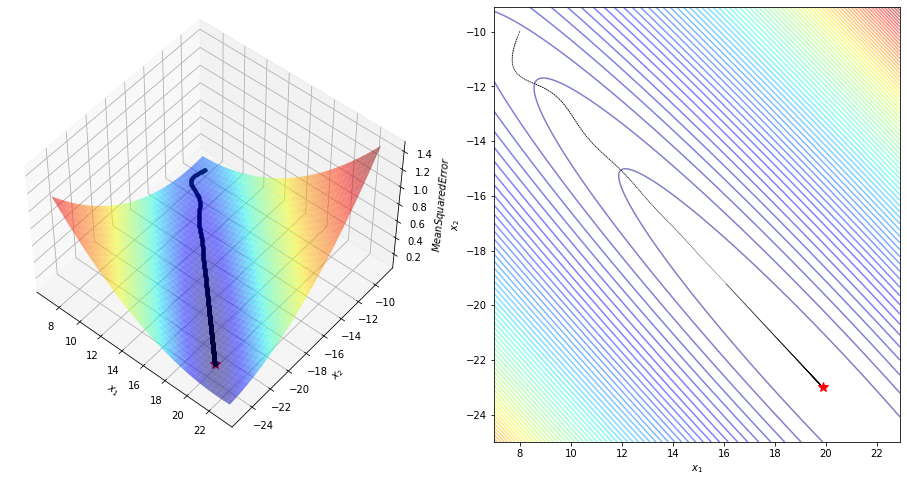

In [21]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, 
                             learning_rate=0.95, momentum_type='nesterov', momentum=0.95, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 9.9530e-01	 7.4957e-01	 9.0583e-02	r2:  0.0609
 200	 200	 3.1384e-01	 6.8108e-02	 9.0863e-02	r2:  0.0609
 300	 300	 2.5195e-01	 6.2163e-03	 9.1271e-02	r2:  0.0609
 400	 400	 2.4630e-01	 5.7103e-04	 9.1860e-02	r2:  0.0609
 500	 500	 2.4578e-01	 5.2935e-05	 9.2701e-02	r2:  0.0609
 600	 600	 2.4574e-01	 4.9697e-06	 9.3884e-02	r2:  0.0609
 700	 700	 2.4573e-01	 4.7467e-07	 9.5513e-02	r2:  0.0609
 800	 800	 2.4573e-01	 4.6371e-08	 9.7689e-02	r2:  0.0609
 900	 900	 2.4573e-01	 4.6594e-09	 1.0048e-01	r2:  0.0609

[-0.18953927 -0.32512634]


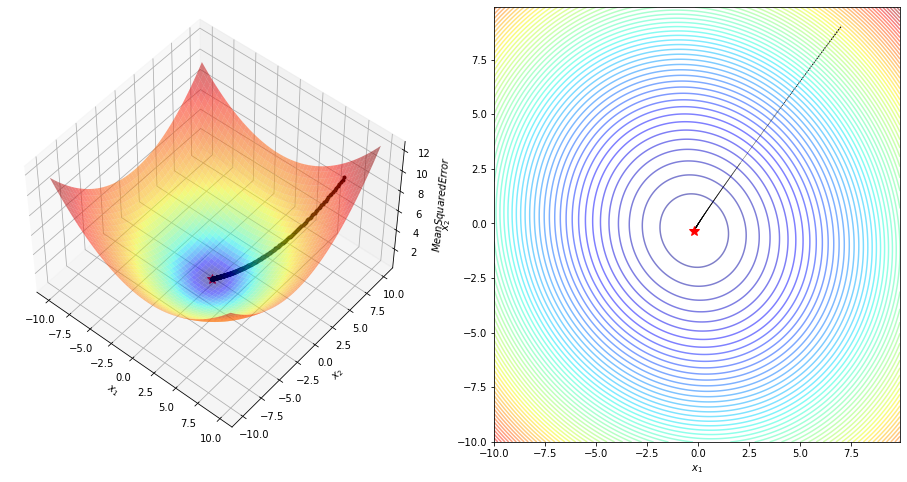

In [22]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## Adam

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 9.0211e-02	 3.0169e-02	 5.4483e-01	r2:  0.7637
 200	 200	 7.3522e-02	 1.3481e-02	 4.4685e-01	r2:  0.7637
 300	 300	 6.5042e-02	 5.0006e-03	 3.7094e-01	r2:  0.7637
 400	 400	 6.1576e-02	 1.5342e-03	 3.0681e-01	r2:  0.7637
 500	 500	 6.0427e-02	 3.8596e-04	 2.5157e-01	r2:  0.7637
 600	 600	 6.0121e-02	 7.9066e-05	 2.0486e-01	r2:  0.7637
 700	 700	 6.0055e-02	 1.3111e-05	 1.6582e-01	r2:  0.7637
 800	 800	 6.0043e-02	 1.7477e-06	 1.3330e-01	r2:  0.7637
 900	 900	 6.0042e-02	 1.8565e-07	 1.0622e-01	r2:  0.7637

[ 19.86229035 -22.99214534]


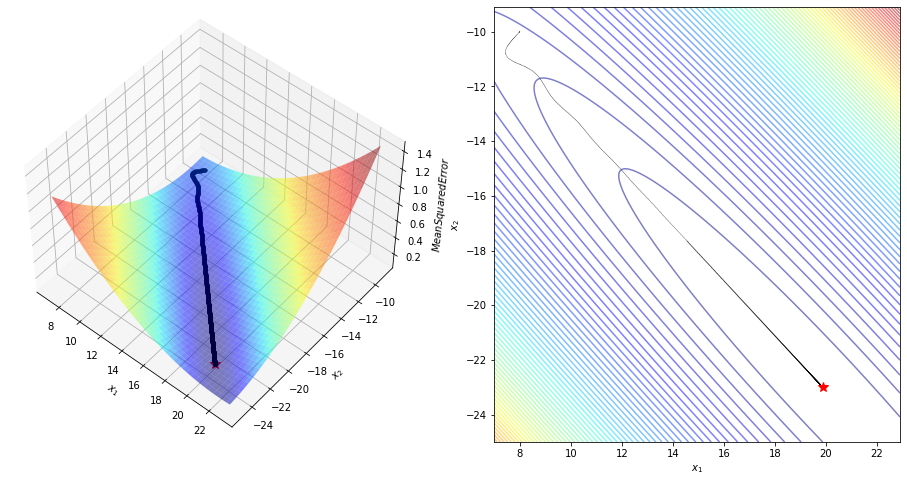

In [27]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 4.4582e-01	 2.0009e-01	 2.4181e-02	r2:  0.0609
 200	 200	 2.4633e-01	 5.9667e-04	 2.9819e-03	r2:  0.0609
 300	 300	 2.4573e-01	 4.5635e-08	 7.6482e-05	r2:  0.0609
 400	 400	 2.4573e-01	 1.2518e-12	 2.7431e-05	r2:  0.0609
 500	 500	 2.4573e-01	 5.5511e-17	 4.4345e-05	r2:  0.0609
 600	 600	 2.4573e-01	 8.3267e-17	 1.5000e+00	r2:  0.0609
 700	 700	 2.4573e-01	 2.7756e-17	 3.3333e-01	r2:  0.0609
 800	 800	 2.4573e-01	 2.7756e-17	 1.0000e+00	r2:  0.0609
 900	 900	 2.4573e-01	 0.0000e+00	 0.0000e+00	r2:  0.0609

[-0.18954349 -0.32522076]


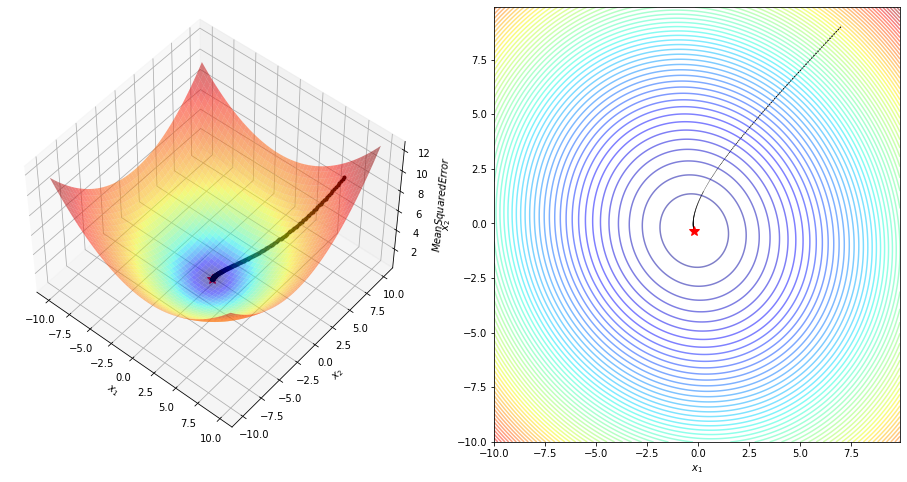

In [28]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaMax

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 9.1532e-02	 3.1490e-02	 5.6868e-01	r2:  0.7637
 200	 200	 7.7259e-02	 1.7217e-02	 5.4675e-01	r2:  0.7637
 300	 300	 6.8953e-02	 8.9118e-03	 5.1761e-01	r2:  0.7637
 400	 400	 6.4305e-02	 4.2632e-03	 4.7838e-01	r2:  0.7637
 500	 500	 6.1925e-02	 1.8832e-03	 4.4174e-01	r2:  0.7637
 600	 600	 6.0799e-02	 7.5723e-04	 4.0209e-01	r2:  0.7637
 700	 700	 6.0317e-02	 2.7510e-04	 3.6330e-01	r2:  0.7637
 800	 800	 6.0132e-02	 9.0960e-05	 3.3064e-01	r2:  0.7637
 900	 900	 6.0067e-02	 2.4968e-05	 2.7450e-01	r2:  0.7637

[ 19.77506118 -22.8315356 ]


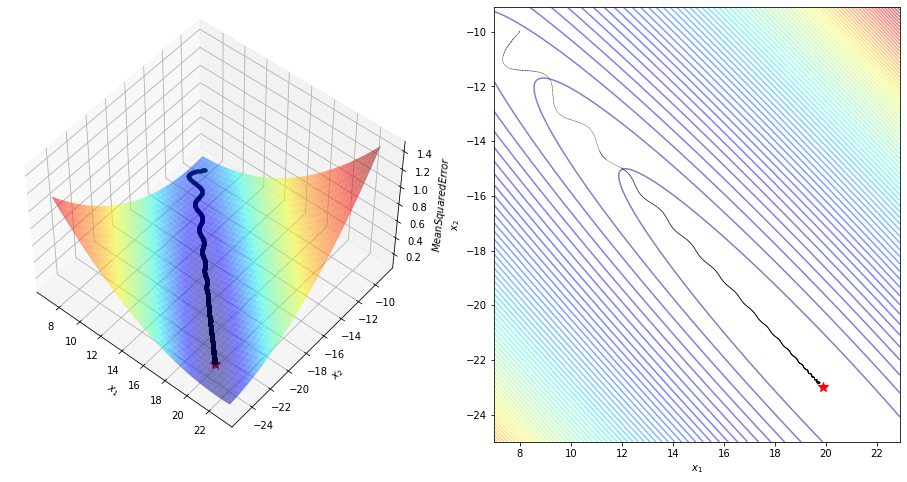

In [31]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 7.6557e-01	 5.1984e-01	 6.2822e-02	r2:  0.0609
 200	 200	 2.7249e-01	 2.6758e-02	 5.1474e-02	r2:  0.0609
 300	 300	 2.4694e-01	 1.2095e-03	 4.5203e-02	r2:  0.0609
 400	 400	 2.4577e-01	 4.3325e-05	 3.5820e-02	r2:  0.0609
 500	 500	 2.4573e-01	 1.0744e-06	 2.4799e-02	r2:  0.0609
 600	 600	 2.4573e-01	 1.6380e-08	 1.5245e-02	r2:  0.0609
 700	 700	 2.4573e-01	 1.3661e-10	 8.3405e-03	r2:  0.0609
 800	 800	 2.4573e-01	 5.3840e-13	 3.9410e-03	r2:  0.0609
 900	 900	 2.4573e-01	 8.3267e-16	 1.5466e-03	r2:  0.0609

[-0.18954349 -0.32522075]


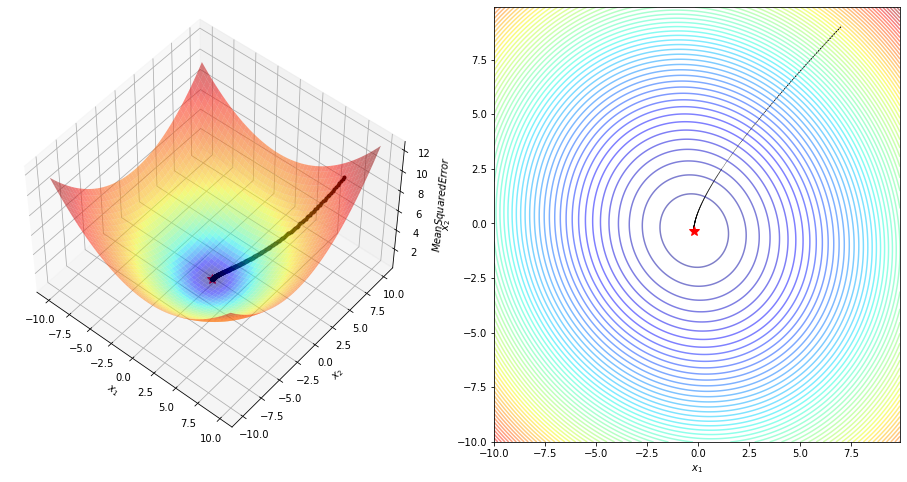

In [32]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AMSGrad

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 7.2426e-02	 1.2385e-02	 2.2366e-01	r2:  0.7637
 200	 200	 6.3164e-02	 3.1221e-03	 2.5209e-01	r2:  0.7637
 300	 300	 6.0835e-02	 7.9312e-04	 2.5403e-01	r2:  0.7637
 400	 400	 6.0243e-02	 2.0148e-04	 2.5403e-01	r2:  0.7637
 500	 500	 6.0093e-02	 5.1183e-05	 2.5403e-01	r2:  0.7637
 600	 600	 6.0055e-02	 1.3002e-05	 2.5403e-01	r2:  0.7637
 700	 700	 6.0045e-02	 3.3030e-06	 2.5403e-01	r2:  0.7637
 800	 800	 6.0042e-02	 8.3906e-07	 2.5403e-01	r2:  0.7637
 900	 900	 6.0042e-02	 2.1315e-07	 2.5403e-01	r2:  0.7637

[ 19.85608913 -22.98616925]


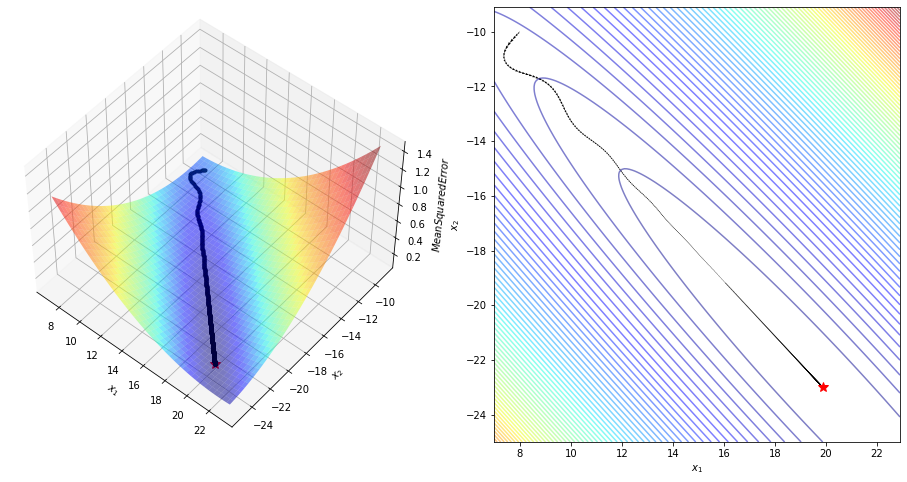

In [34]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 2.3666e+00	 2.1209e+00	 2.5630e-01	r2:  0.0609
 200	 200	 1.0127e+00	 7.6699e-01	 3.6164e-01	r2:  0.0609
 300	 300	 5.4603e-01	 3.0030e-01	 3.9153e-01	r2:  0.0609
 400	 400	 3.6776e-01	 1.2203e-01	 4.0635e-01	r2:  0.0609
 500	 500	 2.9682e-01	 5.1092e-02	 4.1869e-01	r2:  0.0609
 600	 600	 2.6764e-01	 2.1906e-02	 4.2876e-01	r2:  0.0609
 700	 700	 2.5529e-01	 9.5629e-03	 4.3654e-01	r2:  0.0609
 800	 800	 2.4996e-01	 4.2297e-03	 4.4231e-01	r2:  0.0609
 900	 900	 2.4762e-01	 1.8884e-03	 4.4645e-01	r2:  0.0609

[-0.20336328 -0.20006012]


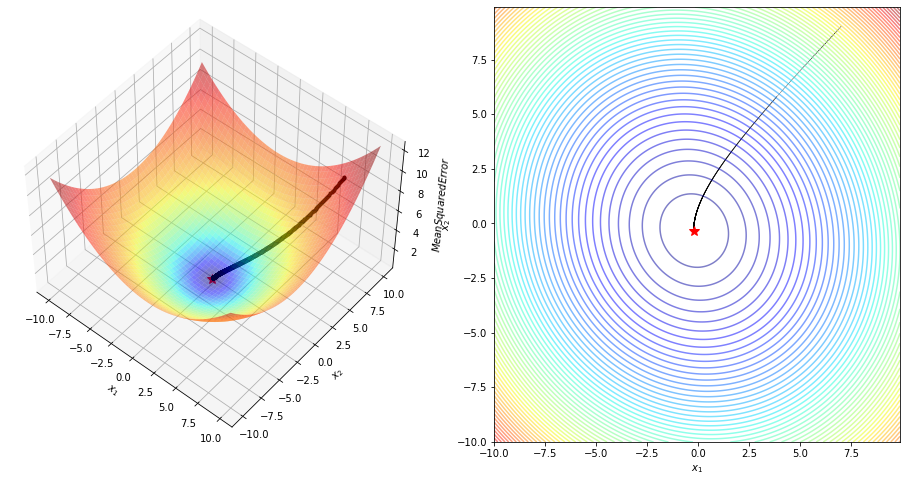

In [36]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.01, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaDelta

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 500	 500	 9.7235e-02	 3.7194e-02	 6.7168e-01	r2:  0.7637
1000	1000	 8.8067e-02	 2.8026e-02	 7.5351e-01	r2:  0.7637
1500	1500	 8.1145e-02	 2.1103e-02	 7.5300e-01	r2:  0.7637
2000	2000	 7.5924e-02	 1.5883e-02	 7.5261e-01	r2:  0.7637
2500	2500	 7.1990e-02	 1.1949e-02	 7.5232e-01	r2:  0.7637
3000	3000	 6.9028e-02	 8.9866e-03	 7.5210e-01	r2:  0.7637
3500	3500	 6.6799e-02	 6.7573e-03	 7.5193e-01	r2:  0.7637
4000	4000	 6.5122e-02	 5.0801e-03	 7.5180e-01	r2:  0.7637
4500	4500	 6.3860e-02	 3.8188e-03	 7.5171e-01	r2:  0.7637
5000	5000	 6.2912e-02	 2.8703e-03	 7.5164e-01	r2:  0.7637
5500	5500	 6.2199e-02	 2.1573e-03	 7.5158e-01	r2:  0.7637
6000	6000	 6.1663e-02	 1.6213e-03	 7.5154e-01	r2:  0.7637
6500	6500	 6.1260e-02	 1.2184e-03	 7.5151e-01	r2:  0.7637
7000	7000	 6.0957e-02	 9.1563e-04	 7.5149e-01	r2:  0.7637
7500	7500	 6.0730e-02	 6.8807e-04	 7.5147e-01	r2:  0.7637
8000	8000	 6.0559e-02	 5.1706e-04	 7.5146e-01	r2:  0

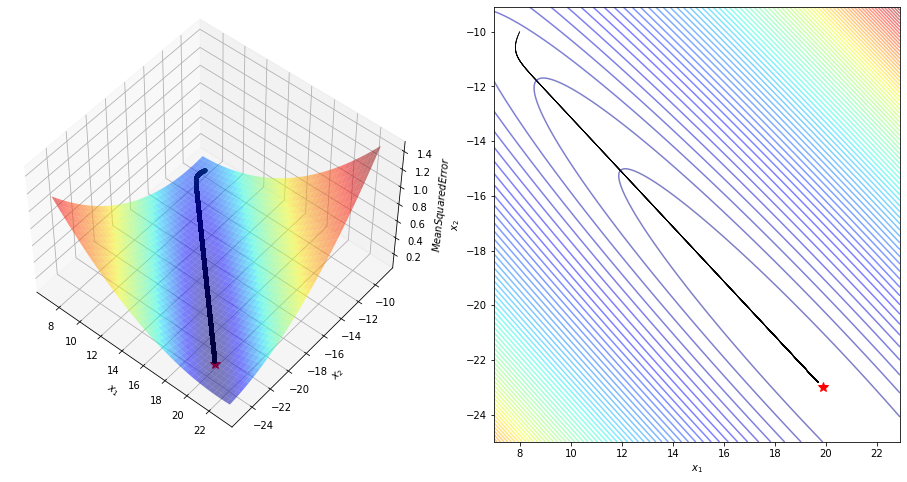

In [41]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.9, 
                             max_iter=15000, verbose=500).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 5.2438e+00	 4.9981e+00	 6.0401e-01	r2:  0.0609
 200	 200	 3.4812e+00	 3.2355e+00	 6.4734e-01	r2:  0.0609
 300	 300	 2.1948e+00	 1.9491e+00	 6.0242e-01	r2:  0.0609
 400	 400	 1.2740e+00	 1.0282e+00	 5.2754e-01	r2:  0.0609
 500	 500	 6.8614e-01	 4.4041e-01	 4.2832e-01	r2:  0.0609
 600	 600	 3.8380e-01	 1.3807e-01	 3.1351e-01	r2:  0.0609
 700	 700	 2.6868e-01	 2.2952e-02	 1.6623e-01	r2:  0.0609
 800	 800	 2.4592e-01	 1.8677e-04	 8.1374e-03	r2:  0.0609
 900	 900	 2.4573e-01	 8.5812e-11	 4.5946e-07	r2:  0.0609

[-0.1895435  -0.32522075]


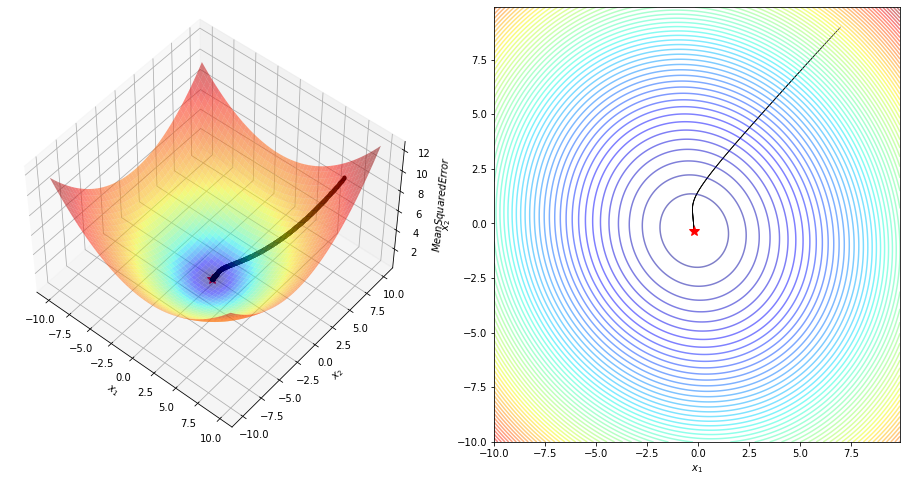

In [42]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 500	 500	 6.0043e-02	 1.4842e-06	 2.6804e-05	r2:  0.7637

[ 19.8687485  -22.99885011]


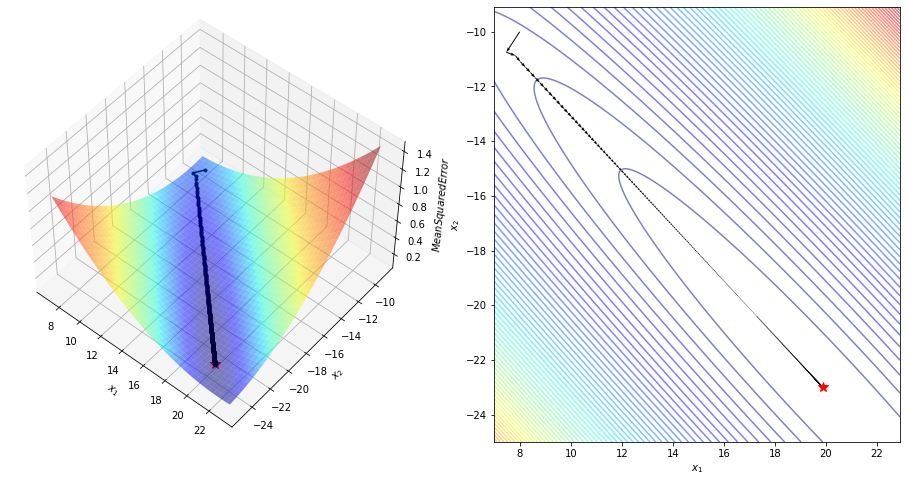

In [50]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaGrad, learning_rate=0.9, verbose=500).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 2.6539e-01	 1.9659e-02	 2.3757e-03	r2:  0.0609
 200	 200	 2.4593e-01	 2.0323e-04	 1.0338e-02	r2:  0.0609
 300	 300	 2.4573e-01	 2.3090e-06	 1.1361e-02	r2:  0.0609
 400	 400	 2.4573e-01	 2.6440e-08	 1.1451e-02	r2:  0.0609
 500	 500	 2.4573e-01	 3.0296e-10	 1.1458e-02	r2:  0.0609
 600	 600	 2.4573e-01	 3.4716e-12	 1.1459e-02	r2:  0.0609
 700	 700	 2.4573e-01	 3.9885e-14	 1.1489e-02	r2:  0.0609
 800	 800	 2.4573e-01	 4.7184e-16	 1.1830e-02	r2:  0.0609
 900	 900	 2.4573e-01	 2.7756e-17	 5.8824e-02	r2:  0.0609

[-0.18954349 -0.32522075]


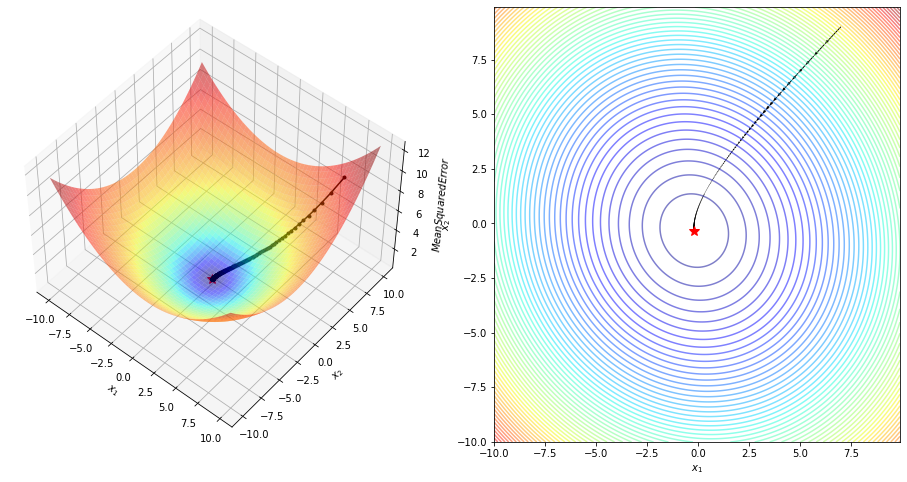

In [51]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaGrad, learning_rate=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RProp

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 7.9516e-02	 1.9474e-02	 3.5169e-01	r2:  0.7637
 200	 200	 6.1044e-02	 1.0028e-03	 5.1495e-02	r2:  0.7637
 300	 300	 6.0098e-02	 5.6780e-05	 5.6620e-02	r2:  0.7637
 400	 400	 6.0044e-02	 2.8542e-06	 5.0268e-02	r2:  0.7637
 500	 500	 6.0042e-02	 1.4227e-07	 4.9846e-02	r2:  0.7637
 600	 600	 6.0042e-02	 7.1111e-09	 4.9982e-02	r2:  0.7637
 700	 700	 6.0042e-02	 3.3121e-10	 4.6577e-02	r2:  0.7637
 800	 800	 6.0042e-02	 1.5942e-11	 4.8133e-02	r2:  0.7637
 900	 900	 6.0042e-02	 5.9500e-13	 3.7323e-02	r2:  0.7637

[ 19.86919801 -22.99930118]


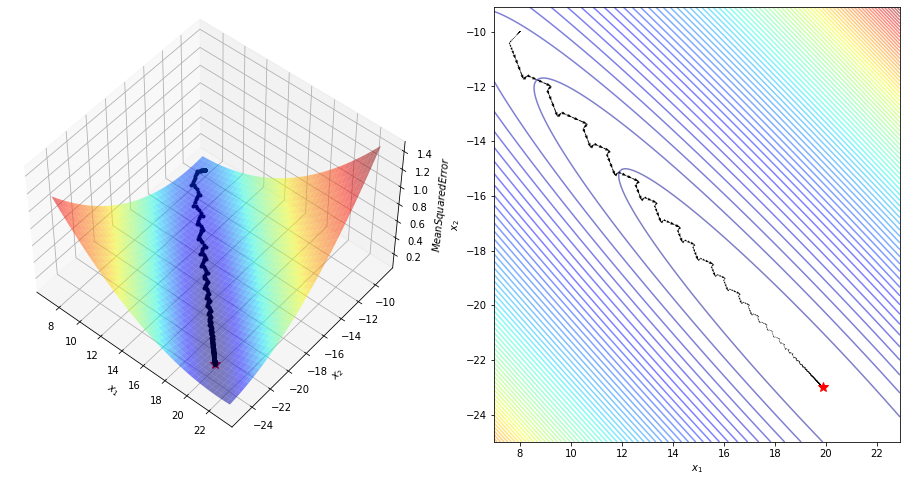

In [44]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.01, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 2.4573e-01	 8.3575e-09	 1.0100e-09	r2:  0.0609
 200	 200	 2.4573e-01	 6.3005e-14	 7.5388e-06	r2:  0.0609
 300	 300	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 400	 400	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 500	 500	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 600	 600	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 700	 700	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 800	 800	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609
 900	 900	 2.4573e-01	 6.3005e-14	 1.0000e+00	r2:  0.0609

[-0.18954332 -0.32522036]


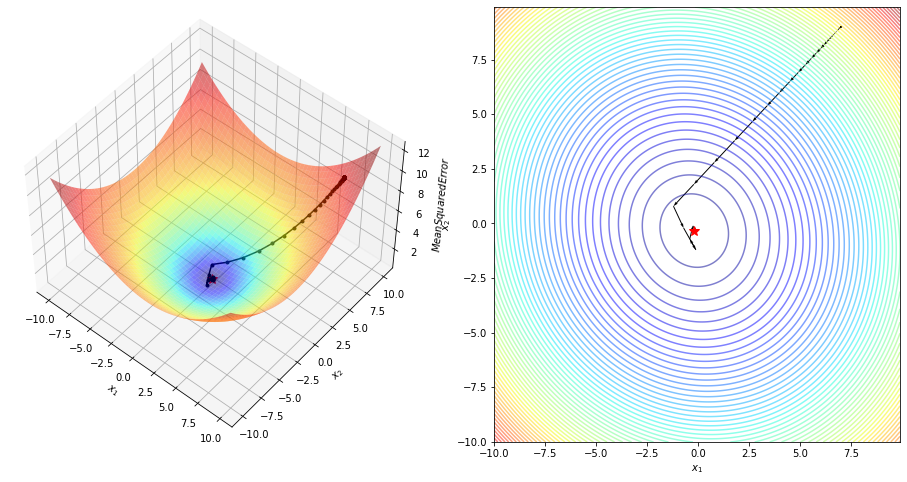

In [52]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.01, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RMSProp

epoch	iter	 cost		 gap		 rate
   0	   0	 1.1542e-01	 5.5374e-02			r2:  0.7637
 100	 100	 1.0447e-01	 4.4425e-02	 8.0228e-01	r2:  0.7637
 200	 200	 7.7130e-02	 1.7088e-02	 3.8465e-01	r2:  0.7637
 300	 300	 6.2458e-02	 2.4168e-03	 1.4143e-01	r2:  0.7637
 400	 400	 6.0045e-02	 3.7535e-06	 1.5531e-03	r2:  0.7637
 500	 500	 6.0054e-02	 1.2269e-05	 3.2685e+00	r2:  0.7637
 600	 600	 6.0054e-02	 1.2302e-05	 1.0027e+00	r2:  0.7637
 700	 700	 6.0054e-02	 1.2302e-05	 9.9996e-01	r2:  0.7637
 800	 800	 6.0054e-02	 1.2302e-05	 1.0000e+00	r2:  0.7637
 900	 900	 6.0054e-02	 1.2302e-05	 1.0000e+00	r2:  0.7637

[ 19.84422576 -23.02432987]


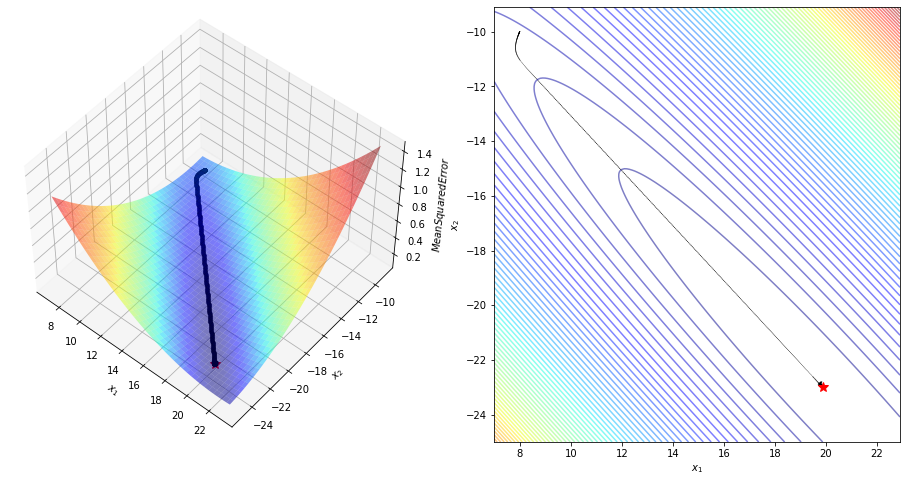

In [47]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.05, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=23, y_min=-25, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.5206e+00	 8.2749e+00			r2:  0.0609
 100	 100	 3.0079e-01	 5.5056e-02	 6.6534e-03	r2:  0.0609
 200	 200	 2.4640e-01	 6.6863e-04	 1.2144e-02	r2:  0.0609
 300	 300	 2.4603e-01	 2.9796e-04	 4.4563e-01	r2:  0.0609
 400	 400	 2.4603e-01	 2.9920e-04	 1.0042e+00	r2:  0.0609
 500	 500	 2.4603e-01	 2.9921e-04	 1.0000e+00	r2:  0.0609
 600	 600	 2.4603e-01	 2.9921e-04	 1.0000e+00	r2:  0.0609
 700	 700	 2.4603e-01	 2.9921e-04	 1.0000e+00	r2:  0.0609
 800	 800	 2.4603e-01	 2.9921e-04	 1.0000e+00	r2:  0.0609
 900	 900	 2.4603e-01	 2.9921e-04	 1.0000e+00	r2:  0.0609

[-0.13954349 -0.27522076]


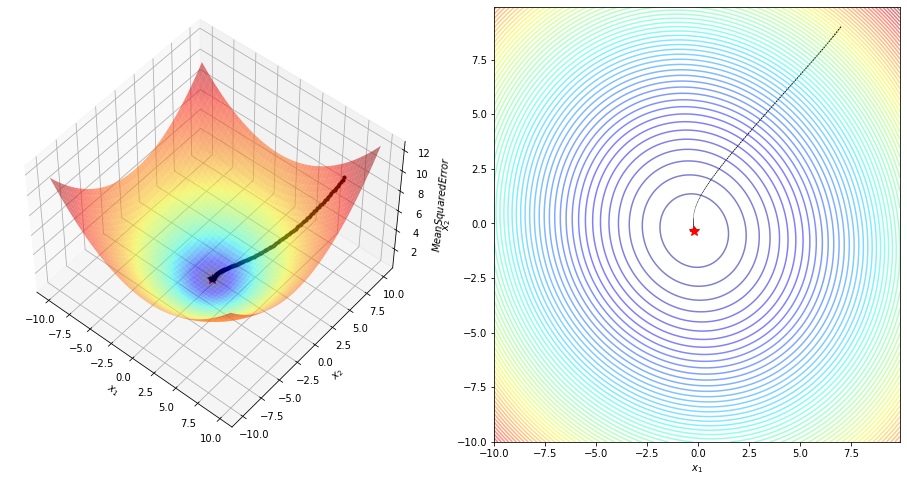

In [48]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)